# 11. Introdução e Preparação

- Modelos Pré Treinados: 21MB; 48MB; 550MB;
- Etapas Iniciais:
    - Instalar módulo spacy;
    - Download do modelo pré-treinado em português;
    - Carregar módulo spacy;
    - Carregar modelo: cria objeto nlp;

## Pipeline Spacy

O método nlp produz um objeto DOC, que é processado de acordo com um pipeline.

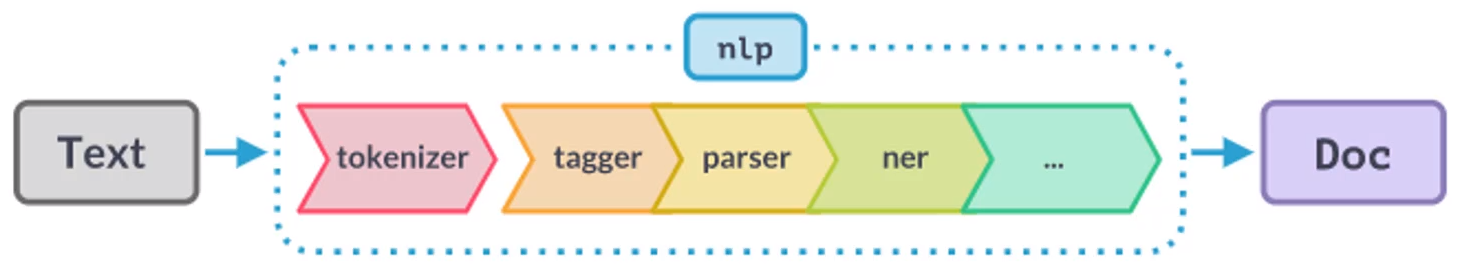

In [120]:
import pandas as pd
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\pipeline.png')

# Exibir a imagem
imagem

## Versão Spacy


Instalar a versão 3.x

In [121]:
!pip install -U spacy==3.7.5 #Spacy mais novo

ERROR: Invalid requirement: '#Spacy'


In [122]:
!python -m spacy download pt_core_news_lg #modelo de mais largo

ERROR: Invalid requirement: '#modelo'


In [123]:
import spacy

In [124]:
nlp = spacy.load("pt_core_news_lg")

In [125]:
print(type(nlp))

<class 'spacy.lang.pt.Portuguese'>


In [126]:
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [127]:
documento = nlp("As ações do Magazine Luiza S.A., Franca, Brasil, acumularam baixa de 75% ao ano. Assim já devolveram todos os ganhos do período da pandemia.")
#documento = nlp("Alegações extraordinárias requerem evidências extraordinárias. Carl Sagan: 'https://carlsagan.com'")

In [128]:
len(documento.vocab)

375

In [129]:
print(type(documento))

<class 'spacy.tokens.doc.Doc'>


# 12. Produção de Tokens

## NLP

- DOC
- Token
- Span

## Textos são codificados em hashes únicos

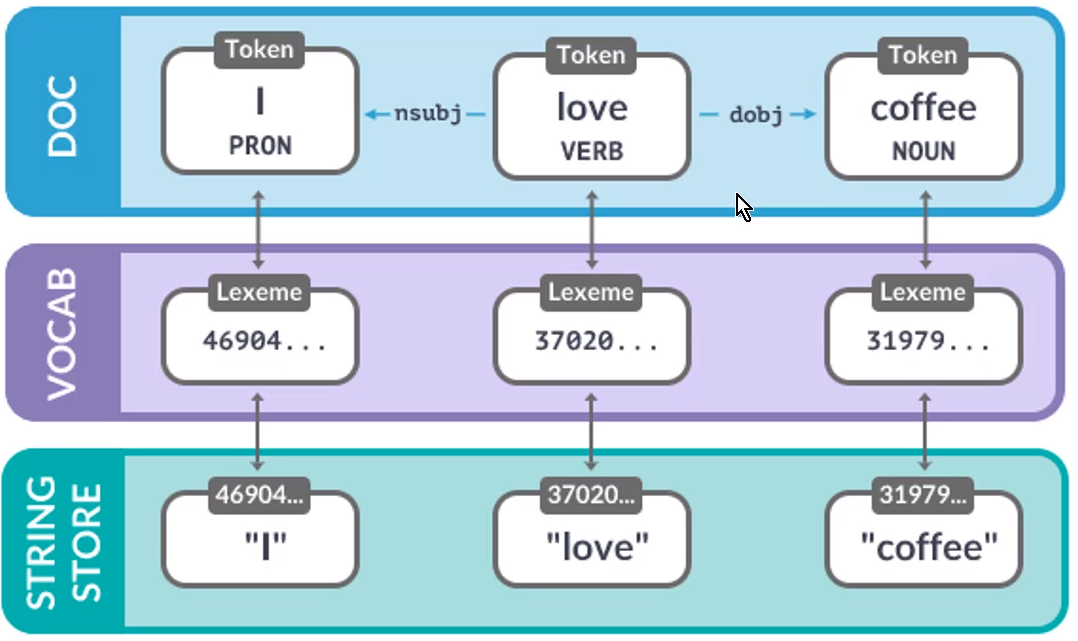

In [130]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\tokens.png')

# Exibir a imagem
imagem

## Propriedades de um Token

> Podemos chegar a diversos atributos de um token, como:

>> Se ele é stop word;

>> Se ele é alfa numérico;

>> Se é pontuação;

>> Se é inicial na sentença;

>> Etc;

In [131]:
for token in documento:
    print(' | ',token.text,' | ', token.pos_, ' | ', token.lemma_, ' | ')

 |  As  |  DET  |  o  | 
 |  ações  |  NOUN  |  ação  | 
 |  do  |  ADP  |  de o  | 
 |  Magazine  |  PROPN  |  Magazine  | 
 |  Luiza  |  PROPN  |  Luiza  | 
 |  S.A.  |  PROPN  |  S.A.  | 
 |  ,  |  PUNCT  |  ,  | 
 |  Franca  |  PROPN  |  Franca  | 
 |  ,  |  PUNCT  |  ,  | 
 |  Brasil  |  PROPN  |  Brasil  | 
 |  ,  |  PUNCT  |  ,  | 
 |  acumularam  |  VERB  |  acumular  | 
 |  baixa  |  NOUN  |  baixa  | 
 |  de  |  ADP  |  de  | 
 |  75  |  NUM  |  75  | 
 |  %  |  SYM  |  %  | 
 |  ao  |  ADP  |  a o  | 
 |  ano  |  NOUN  |  ano  | 
 |  .  |  PUNCT  |  .  | 
 |  Assim  |  ADV  |  assim  | 
 |  já  |  ADV  |  já  | 
 |  devolveram  |  VERB  |  devolver  | 
 |  todos  |  DET  |  todo  | 
 |  os  |  DET  |  o  | 
 |  ganhos  |  NOUN  |  ganho  | 
 |  do  |  ADP  |  de o  | 
 |  período  |  NOUN  |  período  | 
 |  da  |  ADP  |  de o  | 
 |  pandemia  |  NOUN  |  pandemia  | 
 |  .  |  PUNCT  |  .  | 


In [132]:
print(documento[3])

Magazine


In [133]:
print(documento[3:5])

Magazine Luiza


In [134]:
print(len(documento))

30


In [135]:
print("Tokens: ", [token.text for token in documento])
print("Stop Words: ", [token.is_stop for token in documento])
print("Alfabéticos: ", [token.is_alpha for token in documento])
print("Pontuais: ", [token.is_punct for token in documento])
print("Iniciais: ", [token.is_sent_start for token in documento])
print("Maiúsculos: ", [token.is_upper for token in documento])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '75', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Stop Words:  [True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, True, False, True, False, True, False, False]
Alfabéticos:  [True, True, True, True, True, False, False, True, False, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False]
Pontuais:  [False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True]
Iniciais:  [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

In [136]:
print("Tokens: ", [token.text for token in documento])
print("Formato: ", [token.shape_ for token in documento])

Tokens:  ['As', 'ações', 'do', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '75', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Formato:  ['Xx', 'xxxx', 'xx', 'Xxxxx', 'Xxxxx', 'X.X.', ',', 'Xxxxx', ',', 'Xxxxx', ',', 'xxxx', 'xxxx', 'xx', 'dd', '%', 'xx', 'xxx', '.', 'Xxxxx', 'xx', 'xxxx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', '.']


In [137]:
for token in documento:
    if token.like_num:
        print("Número encontrado: ", token.text)
    if token.is_punct:
        print("Pontuação encontrada: ", token.text)

Pontuação encontrada:  ,
Pontuação encontrada:  ,
Pontuação encontrada:  ,
Número encontrado:  75
Pontuação encontrada:  %
Pontuação encontrada:  .
Pontuação encontrada:  .


# 13. Pos-Taggin e Dependências

## Part-of-speech

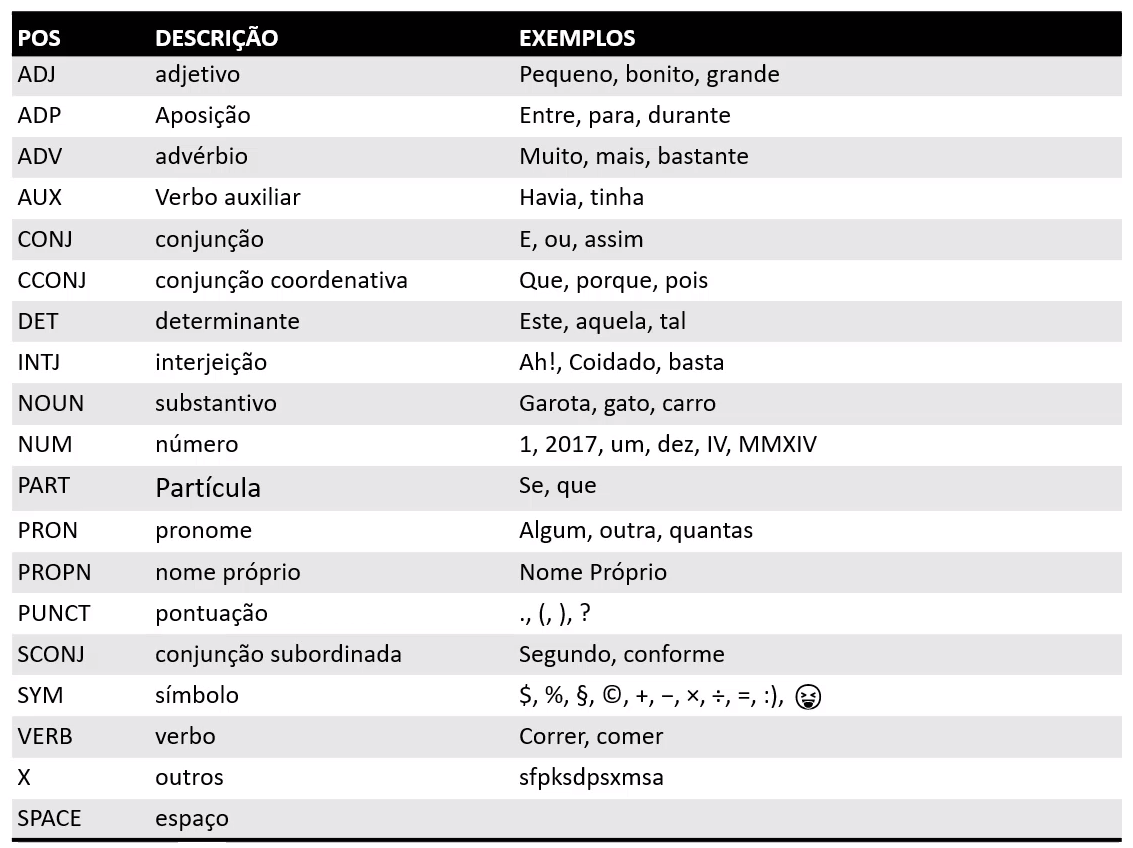

In [138]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\Pos.png')

# Exibir a imagem
imagem

## Dependências

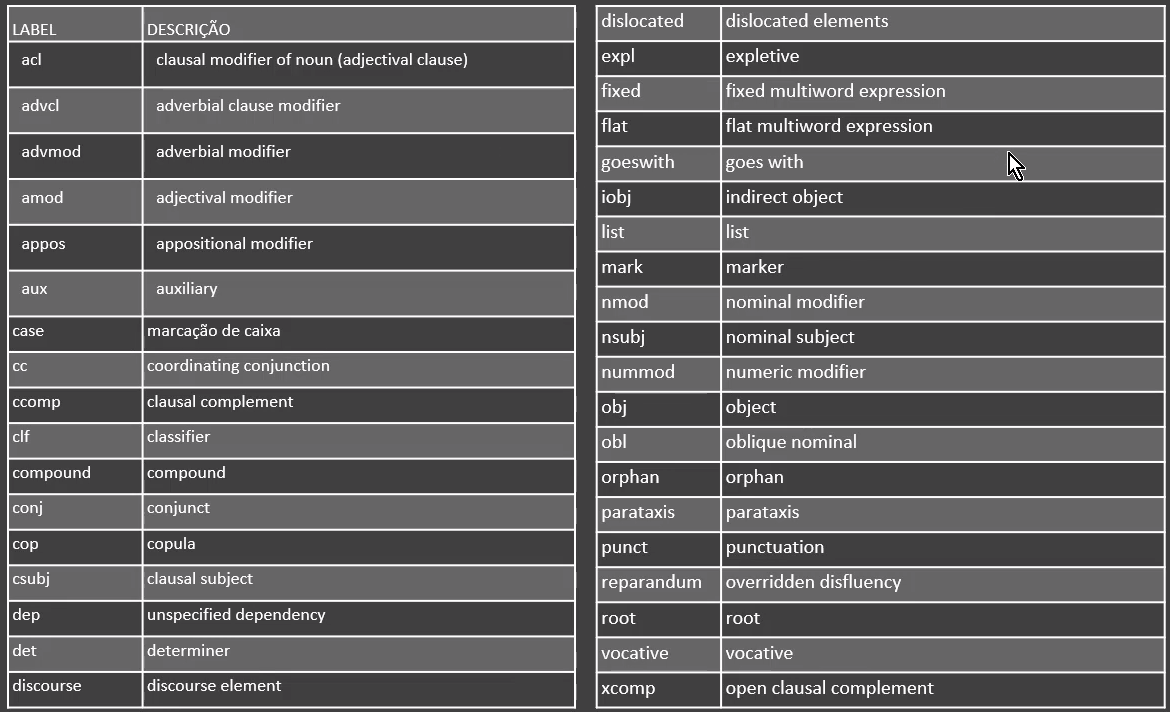

In [139]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\Dependencias.png')

# Exibir a imagem
imagem

In [140]:
for token in documento:
    print(token.text, " - ", token.pos_, " - ", token.dep_, " - ", token.lemma_, " - ", token.shape_)

As  -  DET  -  det  -  o  -  Xx
ações  -  NOUN  -  nsubj  -  ação  -  xxxx
do  -  ADP  -  case  -  de o  -  xx
Magazine  -  PROPN  -  nmod  -  Magazine  -  Xxxxx
Luiza  -  PROPN  -  appos  -  Luiza  -  Xxxxx
S.A.  -  PROPN  -  flat:name  -  S.A.  -  X.X.
,  -  PUNCT  -  punct  -  ,  -  ,
Franca  -  PROPN  -  conj  -  Franca  -  Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
Brasil  -  PROPN  -  conj  -  Brasil  -  Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
acumularam  -  VERB  -  ROOT  -  acumular  -  xxxx
baixa  -  NOUN  -  obj  -  baixa  -  xxxx
de  -  ADP  -  case  -  de  -  xx
75  -  NUM  -  nummod  -  75  -  dd
%  -  SYM  -  nmod  -  %  -  %
ao  -  ADP  -  case  -  a o  -  xx
ano  -  NOUN  -  nmod  -  ano  -  xxx
.  -  PUNCT  -  punct  -  .  -  .
Assim  -  ADV  -  advmod  -  assim  -  Xxxxx
já  -  ADV  -  advmod  -  já  -  xx
devolveram  -  VERB  -  ROOT  -  devolver  -  xxxx
todos  -  DET  -  det  -  todo  -  xxxx
os  -  DET  -  det  -  o  -  xx
ganhos  -  NOUN  -  obj  -  ganho  -  xxxx
d

In [141]:
for token in documento:
    print(token.text, " - ", token.morph)

As  -  Definite=Def|Gender=Fem|Number=Plur|PronType=Art
ações  -  Gender=Fem|Number=Plur
do  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
Magazine  -  Gender=Fem|Number=Sing
Luiza  -  Gender=Fem|Number=Sing
S.A.  -  Number=Sing
,  -  
Franca  -  Gender=Fem|Number=Sing
,  -  
Brasil  -  Gender=Masc|Number=Sing
,  -  
acumularam  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
baixa  -  Gender=Fem|Number=Sing
de  -  
75  -  NumType=Card
%  -  
ao  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
ano  -  Gender=Masc|Number=Sing
.  -  
Assim  -  
já  -  
devolveram  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
todos  -  Gender=Masc|Number=Plur|PronType=Tot
os  -  Definite=Def|Gender=Masc|Number=Plur|PronType=Art
ganhos  -  Gender=Masc|Number=Plur
do  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
período  -  Gender=Masc|Number=Sing
da  -  Definite=Def|Gender=Fem|Number=Sing|PronType=Art
pandemia  -  Gender=Fem|Number=Sing
.  -  


In [142]:
for token in documento:
    print(token.text, " - ", token.tag_)

As  -  DET
ações  -  NOUN
do  -  ADP
Magazine  -  PROPN
Luiza  -  PROPN
S.A.  -  PROPN
,  -  PUNCT
Franca  -  PROPN
,  -  PUNCT
Brasil  -  PROPN
,  -  PUNCT
acumularam  -  VERB
baixa  -  NOUN
de  -  ADP
75  -  NUM
%  -  SYM
ao  -  ADP
ano  -  NOUN
.  -  PUNCT
Assim  -  ADV
já  -  ADV
devolveram  -  VERB
todos  -  DET
os  -  DET
ganhos  -  NOUN
do  -  ADP
período  -  NOUN
da  -  ADP
pandemia  -  NOUN
.  -  PUNCT


# 14. Listando Entidades Nomeadas

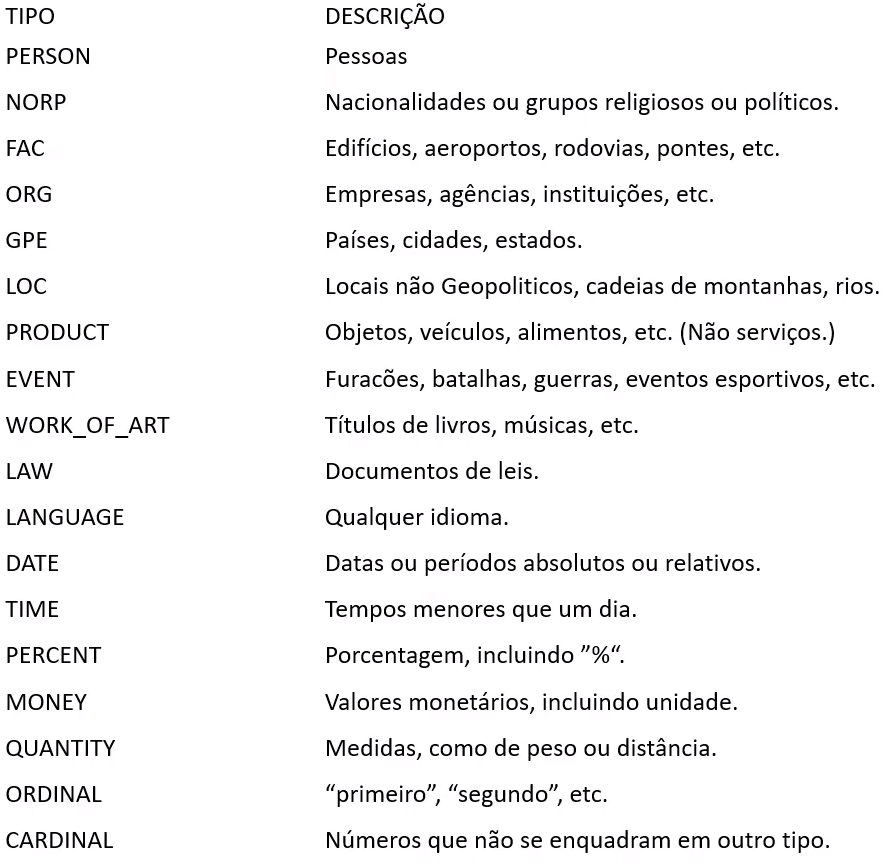

In [143]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\EntidadesNer.png')

# Exibir a imagem
imagem

In [144]:
for ent in documento.ents:
    print(ent.text, " - ", ent.label_)

Magazine Luiza S.A.  -  ORG
Franca  -  LOC
Brasil  -  LOC


# 15. Gerenciando Stop Words

## Lista de Stop Words do Idioma

- Consultar
- Adicionar
- Checar se um token é uma Stop Word

In [145]:
for token in documento:
    if token.is_stop:
        print("Stop Word: " ,token.text)

Stop Word:  As
Stop Word:  do
Stop Word:  de
Stop Word:  ao
Stop Word:  Assim
Stop Word:  já
Stop Word:  todos
Stop Word:  os
Stop Word:  do
Stop Word:  da


In [146]:
for words in nlp.Defaults.stop_words:
    print(words)

tuas
porquê
acerca
novos
tipo
segunda
debaixo
vós
tem
onze
pela
dez
enquanto
lugar
do
estive
área
aquelas
mas
oito
ver
conhecido
dezasseis
você
tarde
foste
falta
meus
desde
obrigada
ali
perto
pegar
mês
uma
sexta
des
lá
diante
cá
comprido
a
contra
primeira
sempre
menor
caminho
deste
nem
aqui
ao
próximo
esta
te
antes
apoia
posso
tendes
pontos
sistema
uns
essas
meses
faço
entre
quê
aquele
tivestes
dizer
que
momento
logo
seis
cedo
obrigado
terceiro
sei
parece
oitava
vêm
minhas
toda
fará
neste
é
quem
quando
não
põe
doze
quinta
tens
fora
vinte
fazeis
após
quarto
vens
pelas
atrás
nossos
quais
sexto
outra
todos
daquela
e
estado
três
vem
naquele
grupo
na
teus
for
por
então
mais
ontem
umas
ponto
inclusive
algo
seus
dizem
ademais
foram
apoio
devem
estava
estivestes
meio
tanto
maioria
ir
maior
tiveste
baixo
bastante
corrente
naquela
local
treze
geral
próprio
vossa
quieta
dois
usar
próxima
tenho
dar
qualquer
meu
esteve
nos
nova
sou
isto
posição
ela
és
este
vossos
demais
mesmo
assim
quinto
era
segun

In [147]:
nlp.Defaults.stop_words.add("eita")
nlp.vocab['eita'].is_stop = True

In [148]:
nlp.vocab['eita'].is_stop

True

In [149]:
token_lista = []
for token in documento:
    token_lista.append(token.text)
    
stop_lista = []
for words in nlp.Defaults.stop_words:
    stop_lista.append(words)
    
semstop = [word for word in token_lista if not word in stop_lista]

print(documento.text)
print(semstop)

As ações do Magazine Luiza S.A., Franca, Brasil, acumularam baixa de 75% ao ano. Assim já devolveram todos os ganhos do período da pandemia.
['As', 'ações', 'Magazine', 'Luiza', 'S.A.', ',', 'Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', '75', '%', 'ano', '.', 'Assim', 'devolveram', 'ganhos', 'período', 'pandemia', '.']


# 16. Vocabulário

## Vocab

- Cada palabra é representada por um Hash
- Internamente o Hash é utilizado

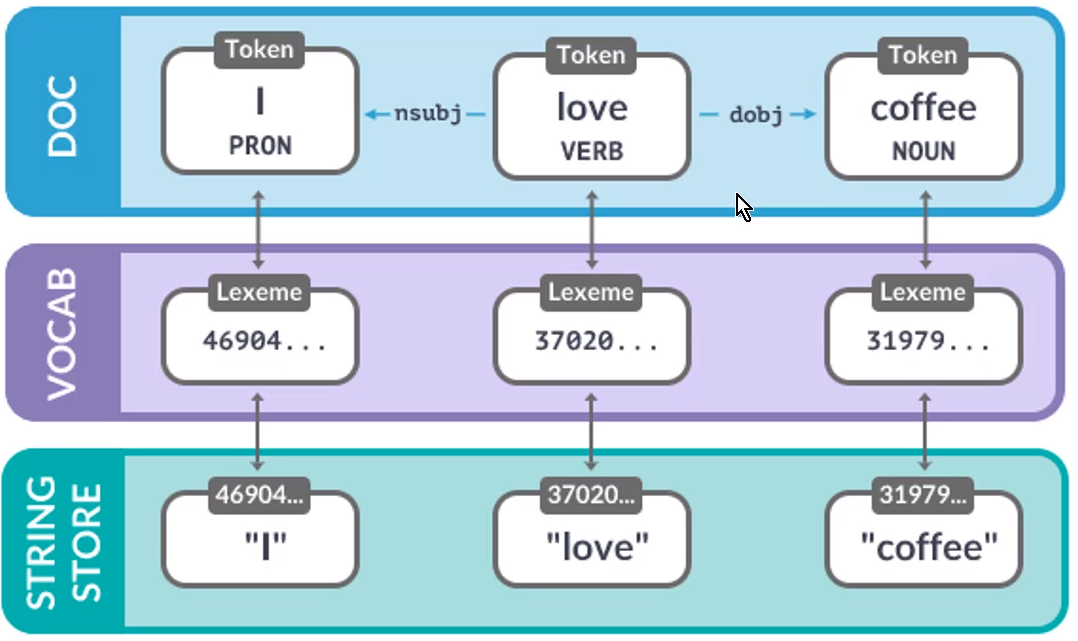

In [150]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\tokens.png')

# Exibir a imagem
imagem

In [151]:
print("Hash: ", nlp.vocab.strings["dados"])
print("Hash: ", documento.vocab.strings["dados"])

Hash:  6013848609874238634
Hash:  6013848609874238634


In [152]:
print("Hash: ", nlp.vocab.strings[6013848609874238634])
print("Hash: ", documento.vocab.strings[6013848609874238634])

Hash:  dados
Hash:  dados


In [153]:
lex = nlp.vocab["dados"]
print(lex.text, " - ", lex.orth, " - ", lex.is_alpha, " - ", lex.is_lower)

dados  -  6013848609874238634  -  True  -  True


In [154]:
print(nlp("dados").vector.shape)
print(nlp("dados").vector)

(300,)
[-1.8078e+00 -2.8421e+00 -5.5345e-01 -4.0565e+00 -2.3565e+00  4.7295e+00
 -3.3508e+00 -1.2036e+00 -5.3749e+00 -7.5768e-01 -2.0015e+00  5.3618e+00
  2.2789e-01  1.2136e+00 -1.4418e+00 -3.0621e+00  2.2060e+00  1.1943e+00
 -1.8689e+00 -5.9128e+00 -5.1929e-01  2.1897e+00 -2.4651e+00  1.7600e+00
 -5.6308e+00  1.0053e+00  7.3080e-01  2.0417e-01 -6.0370e+00  1.7474e+00
  2.0375e+00  2.7541e+00 -1.0423e+00  1.7632e+00 -1.4484e+00 -2.4344e+00
 -8.6094e-01  1.7867e+00 -4.9920e+00 -3.1162e+00 -5.3973e-01  2.4241e+00
  4.4410e-01 -4.7503e+00  2.1383e+00  3.8537e-01 -2.2418e+00  5.8104e+00
 -1.1731e+00  2.4686e-02 -1.8413e+00 -5.9321e+00 -7.0872e-03 -2.3093e+00
  5.5101e+00 -4.1795e-01  2.9754e+00  3.6709e-01 -8.0867e-01 -1.3751e+00
  4.8132e+00 -2.2835e+00 -2.0920e-01  1.2578e+00  4.3466e+00  1.3846e+00
 -1.5847e+00  3.3322e+00 -4.3669e+00  1.8883e+00 -1.2312e+00  3.7902e-01
  8.6331e-01 -4.0607e+00 -1.3444e+00  4.5210e+00  2.2995e-01 -5.9245e+00
 -2.0598e-01 -3.1810e+00 -3.8640e+00  7.2114

In [155]:
print(nlp("dados são uma nova forma de ver o mundo").vector.shape)
print(nlp("dados são uma nova forma de ver o mundo").vector)

(300,)
[ 0.5255733  -1.0520301  -1.0489888   0.22808893 -2.7599888   0.91837215
 -1.6993556  -0.44524103 -2.209261   -1.2901455   0.9939946  -1.3996754
  0.7378708  -1.6957022  -1.382649   -1.1241877   2.503239    1.3766589
 -0.63682556  2.7080245  -0.6679023   0.7990059  -1.3761922   1.6491444
 -0.6950322   0.69378555 -0.19840002  1.6926199  -0.3071023   0.71506053
  0.03211441  0.27212894 -1.9055911  -1.5586021  -0.9775556   0.7999823
 -0.9553054   0.5265729  -0.87427455 -1.2073755  -2.117481    1.2241988
  1.5149522  -0.79308677 -1.1521667   0.13741441 -1.7882053   0.50415283
  1.3089666   0.06542712 -0.6260744  -1.5624356  -0.707184   -1.2425367
 -0.04237115 -0.5879791   1.7004043  -0.24798778  0.11633212 -0.55506223
  2.0148706   0.01965364  0.92778563  2.3571968  -0.49526003  1.0151839
  0.57112557  1.3510779  -0.3038622  -0.24523441 -0.42284998 -0.69732666
  0.71998227  0.2875956   0.10309222 -0.6866155   2.128672    0.9791889
 -1.4044011  -0.4600078   0.10599887  0.84635675  1.

# 17. Buscando Similaridade

## Similaridade

> Similaridade Vs Matcher;

> Similaridade:
>> Retorna um valor (métrica de similaridade);

> Matcher:
> >> Busca um padrão, retorna se encontra (semelhante a expressão regular);

- Baseada em contexto;
- Precisa do modelo Large do Idioma;
- Métrica é o coseno, valor entre Zero e 1;
- Utiliza representação vetorial das palavras (word embeddings e word2vec);
- Pode ser aplicado entre Docs, spans e tokens;

## Melhora de Performance

- Sentenças menores (span);
- Utilizar outra função de similaridade (sense2vec);
- Remover Stop Words, pontuação, pronomes, etc;

In [156]:
documento1 = nlp("Ele viaja regularmente de carro")
documento2 = nlp("Ela viaja regularmente de avião")
print(documento1.similarity(documento2))

0.894174124950273


In [157]:
documento3 = nlp("Devemos dizer comprimento ou cumprimento?")
tokenA = documento3[2]
print(tokenA)
tokenB = documento3[4]
print(tokenB)
print(tokenA.similarity(tokenB))

comprimento
cumprimento
0.5804340839385986


In [158]:
documento4 = nlp("Ele pede descrição. Ele pede discrição.")
parteA = documento4[0:3]
parteB = documento4[4:7]
print(parteA)
print(parteB)
print(parteA.similarity(parteB))

Ele pede descrição
Ele pede discrição
0.9630053639411926


# 18. Busca de Expressões com Matching

## Padrão para telefone (41) 778778877

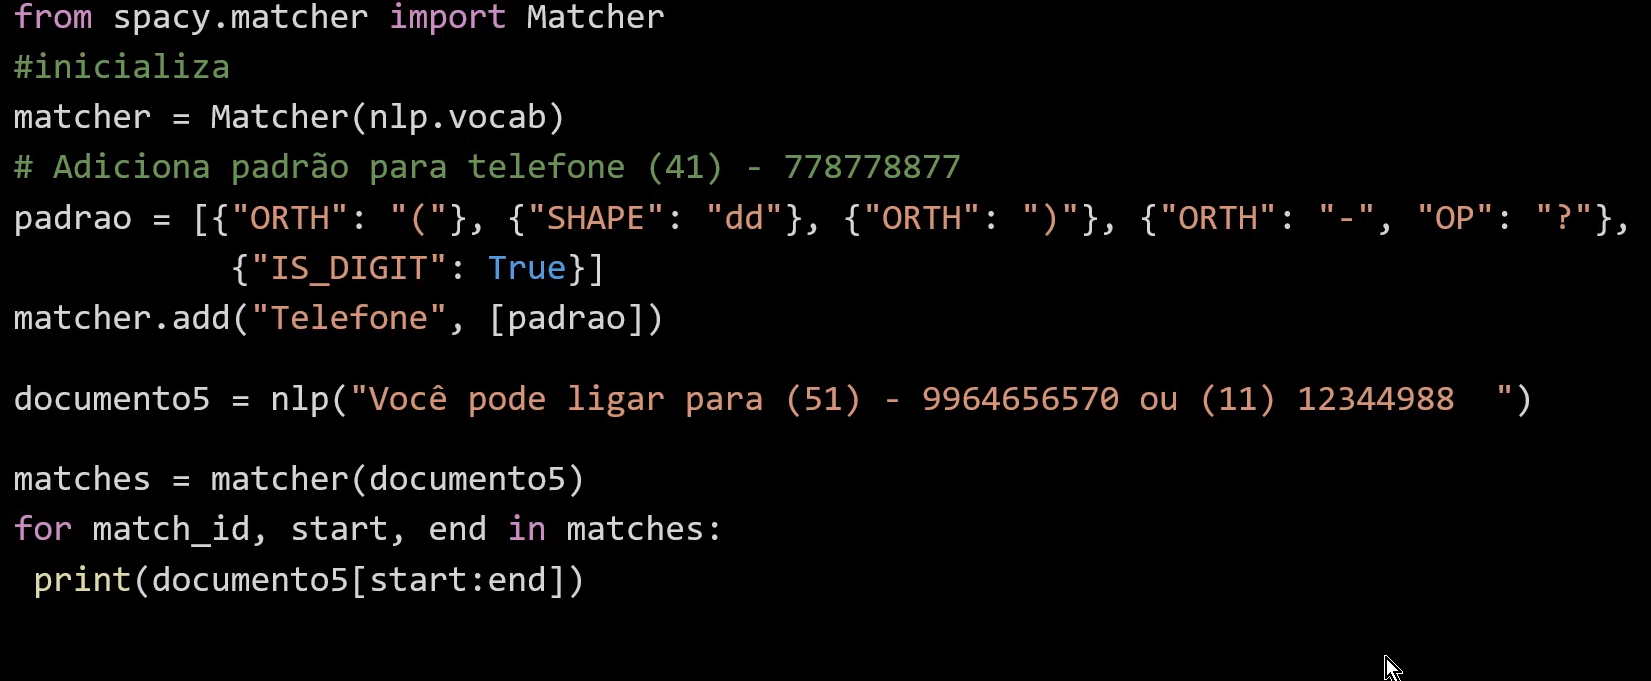

In [159]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\padrao.png')

# Exibir a imagem
imagem

## Atributos de Tokens

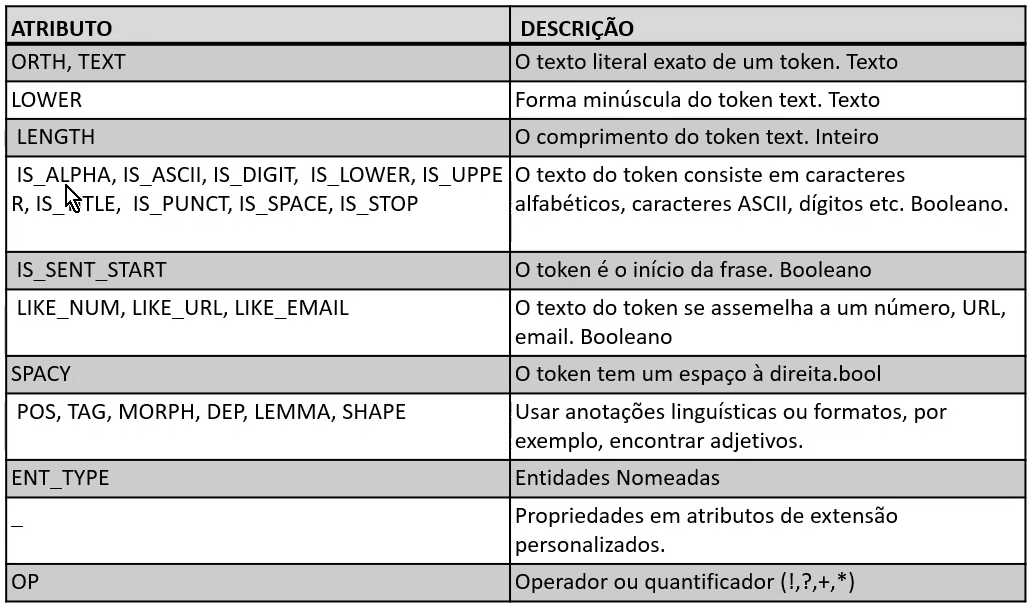

In [160]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\atributos.png')

# Exibir a imagem
imagem

## Padrões estendidos

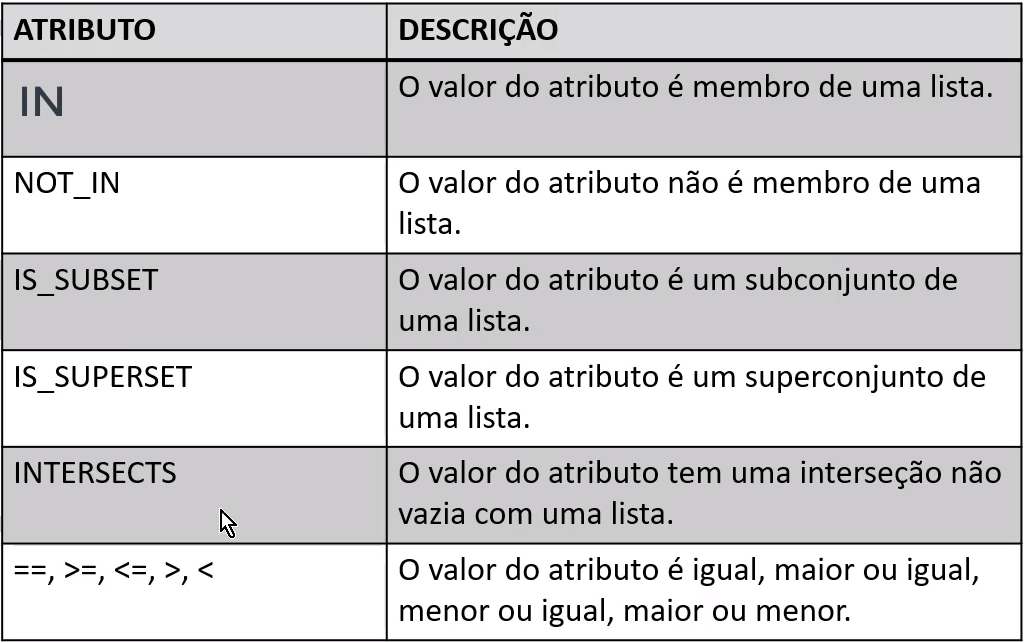

In [161]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\padrao2.png')

# Exibir a imagem
imagem

## Operadores

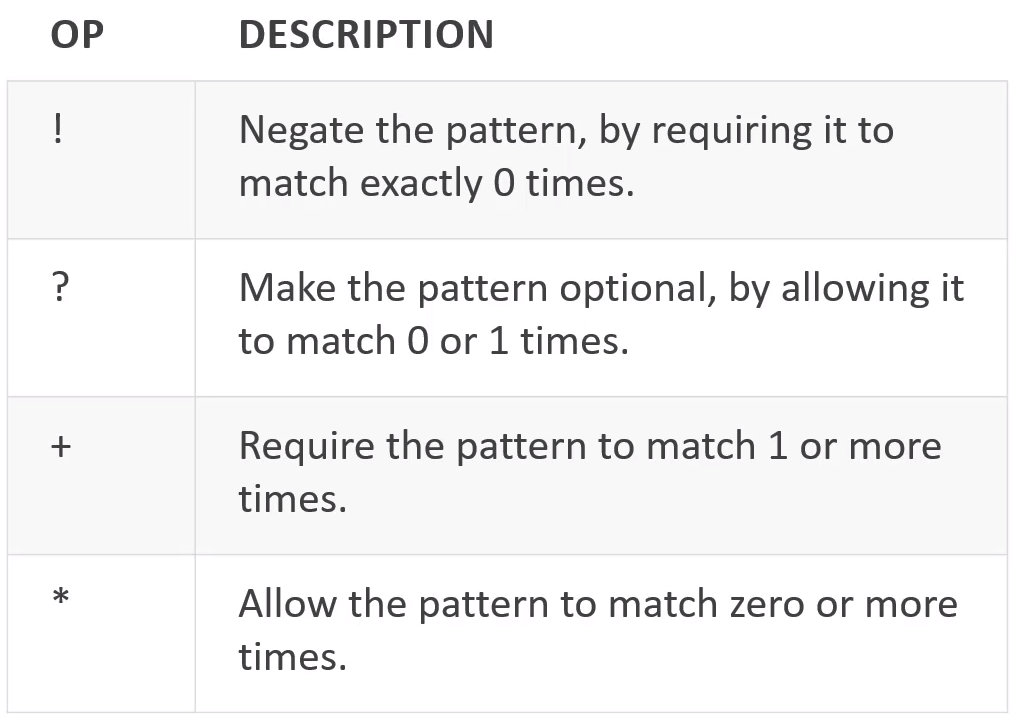

In [162]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\operadores.png')

# Exibir a imagem
imagem

In [163]:
from spacy.matcher import Matcher

In [164]:
documento5 = nlp("Você pode ligar para (47) - 984075321 ou (47) 997351976")

In [165]:
matcher = Matcher(nlp.vocab)
padrao = [{"ORTH": "("}, {"SHAPE": "dd"}, {"ORTH": ")"}, {"ORTH": "-", "OP": "?"}, {"IS_DIGIT": True}]
matcher.add("telefone", [padrao])
matches = matcher(documento5)
for id, inicio, fim in matches:
    print(documento5[inicio:fim])

(47) - 984075321
(47) 997351976


In [172]:
documento6 = nlp("Estamos infectados com micro organismos. MICROORGANISMOS são perigosos. Não enxergamos micro-organismos")
matcher = Matcher(nlp.vocab)
padrao1 = [{"LOWER" : "micro-organismos"}]
padrao2 = [{"LOWER" : "microorganismos"}]
padrao3 = [{"LOWER" : "micro"}, {"LOWER" : "organismos"}]

In [173]:
matcher.add("padrao", [padrao1, padrao2, padrao3])

In [174]:
matches = matcher(documento6)
for id, inicio, fim in matches:
    print(documento6[inicio:fim])

micro organismos
MICROORGANISMOS
micro-organismos


# 19. Visualização com Displacy

## Displacy

> Módulo do Spacy para Visualização.

> Dois estilos principais:

>> Entidades Nomeadas;

>> Dependências;

> Personalizável:

>> Estilo de cores;

>> Estilo de fonte;

>> Fundo;

>> Distância;

>> Etc;

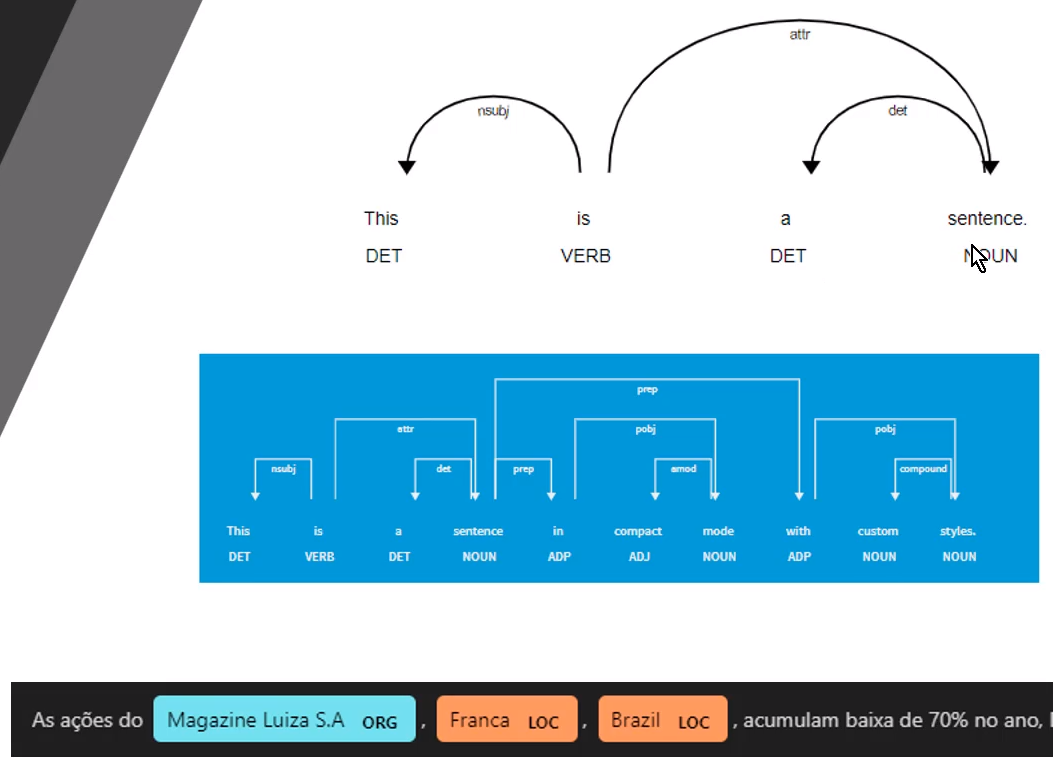

In [175]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\displacy.png')

# Exibir a imagem
imagem

In [188]:
from spacy import displacy
documento.user_data["title"] = "Exemplo de Visualização"
displacy.render(documento, style="ent", jupyter=True)

In [196]:
displacy.render(documento, style="dep", jupyter=True, options={"compact": True, "distance": 100, "color": "#FFFFFF", "bg": "#000000", "font": "Arial", "font_size": 8, "arrow_stroke": 2, "arrow_width": 1, "arrow_color": "#FFFFFF", })

In [214]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from PIL import Image
import io

# Create a canvas object
c = canvas.Canvas("output.pdf", pagesize=letter)

# Render the visualization to an image
image_data = displacy.render(documento, style="dep", jupyter=True, options={"compact": True, "distance": 100, "color": "#FFFFFF", "bg": "#000000", "font": "Arial", "font_size": 8, "arrow_stroke": 2, "arrow_width": 1, "arrow_color": "#FFFFFF", })
image = Image.open(io.BytesIO(image_data))

# Insert the image into the PDF
c.drawImage(image, 50, 700, width=500, height=500)

# Save the PDF
c.save()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001B2ACC84040>

# 20. Gerenciando Pipelines

## Pipeline

- Você pode personalizar o Pipeline para ter apenas as etapas que você precisa
- Etapas podem ser prontas (built-in) ou não prontas (custom)

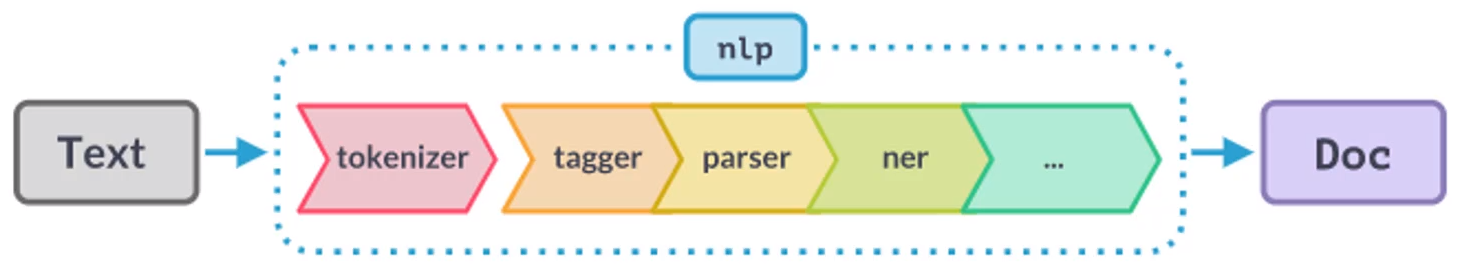

In [198]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\pipeline.png')

# Exibir a imagem
imagem

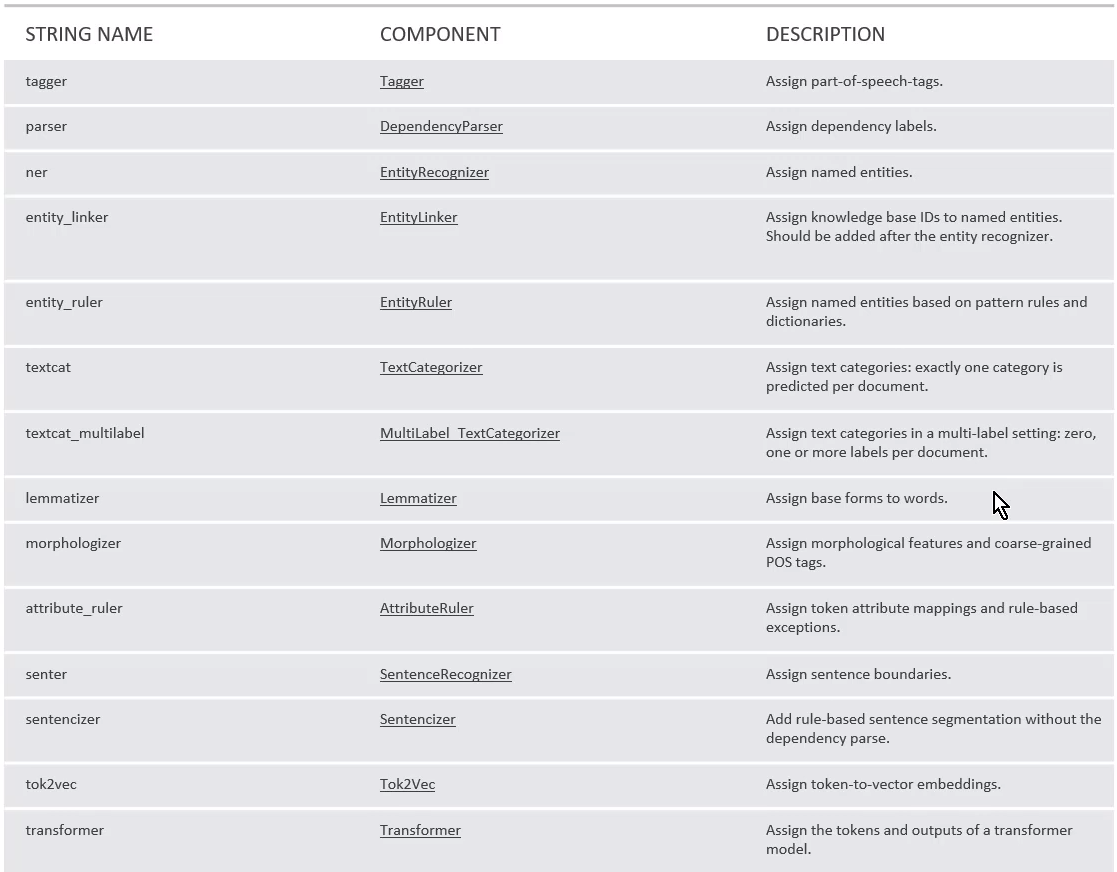

In [199]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\3_Datasets\pipeline2.png')

# Exibir a imagem
imagem

## Modo Pipe

> documento = nlp("texto")
>> Cria um objeto Doc com todo o texto processado.

> Modo Pipe:
>> Python Generator.

- Suporta Multiprocessamento e tamanho de batch personalizados.

In [200]:
print("Pipeline Normal: ", nlp.pipe_names)

Pipeline Normal:  ['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [210]:
nlp.remove_pipe("tok2vec")

('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1b2b73a2c30>)

In [211]:
print("Pipeline sem tok2vec: ", nlp.pipe_names)

Pipeline sem tok2vec:  ['morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [212]:
nlp.add_pipe("tok2vec", after="morphologizer")

In [213]:
print("Pipeline com tok2vec: ", nlp.pipe_names)

Pipeline com tok2vec:  ['morphologizer', 'tok2vec', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']
